## Deep Learning Example and Challenge

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

2025-03-11 17:42:41.611040: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-11 17:42:41.650446: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-11 17:42:41.650474: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-11 17:42:41.651538: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 17:42:41.658357: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Set random seed
np.random.seed(808)

# Generate simulated linear data
n = 1000
b = 30
a = 5

x = np.random.uniform(-1, 1, n).reshape(-1, 1)
y = b + a * x + np.random.randn(n, 1)

<Axes: xlabel='x', ylabel='y'>

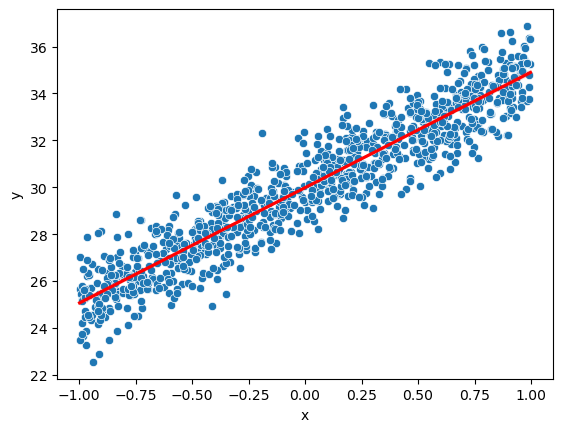

In [3]:
# Convert to DataFrame for visualization
sim = pd.DataFrame({'x': x.flatten(), 'y': y.flatten()})

#Plot the data
sns.scatterplot(x=sim['x'], y=sim['y'])
sns.regplot(x=sim['x'], y=sim['y'], scatter=False, color='red')

In [4]:
# Fit an OLS Regression Model
ols_model = LinearRegression()
ols_model.fit(x, y)

# Print OLS coefficients
print(f"OLS Coefficients: Intercept = {ols_model.intercept_[0]}, Slope = {ols_model.coef_[0][0]}")
print(f"OLS Standard Deviation (Residual Error): {np.sqrt(mean_squared_error(y, ols_model.predict(x)))}")

OLS Coefficients: Intercept = 29.982631103504605, Slope = 4.924209306182985
OLS Standard Deviation (Residual Error): 0.9921601015504126


In [5]:
# Build a simple neural network
model = keras.Sequential([
    keras.layers.Dense(units=1, activation='linear',
                       input_shape=(1,))])

# Compile the model
model.compile(optimizer='sgd', loss='mse')

# Train the model
history = model.fit(x, y, # data
                    batch_size=16, # mini-batch size 
                    epochs=20, # n times through full training data
                    validation_split=0.2, verbose=0
                   )

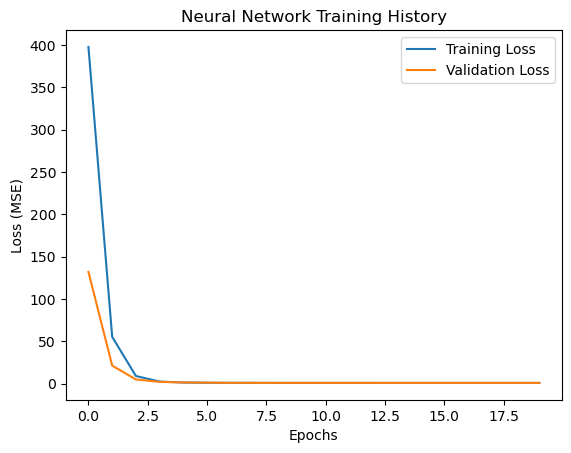

In [6]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title("Neural Network Training History")
plt.show()

In [7]:
# Compare weights from NN and OLS
nn_weights = model.get_weights()
print(f"NN Weights: Intercept = {nn_weights[1][0]}, Slope = {nn_weights[0][0][0]}")
print(f"OLS Coeffs: Intercept = {ols_model.intercept_[0]}, Slope = {ols_model.coef_[0][0]}")

NN Weights: Intercept = 29.974231719970703, Slope = 4.866455078125
OLS Coeffs: Intercept = 29.982631103504605, Slope = 4.924209306182985


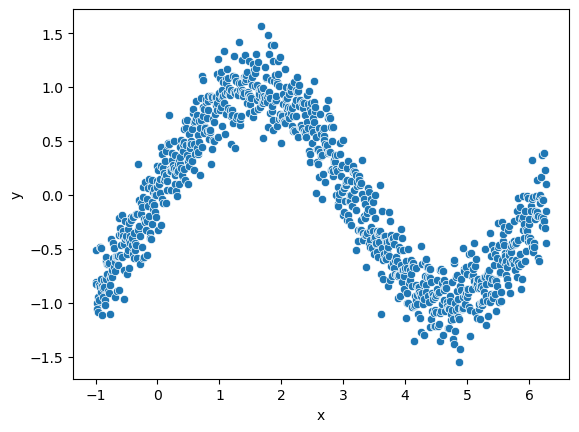

In [8]:
# Generate Sine Wave Data
np.random.seed(321)
x_sine = np.linspace(-1, 2 * np.pi, n).reshape(-1, 1)
e_sine = np.random.normal(0, 0.2, n).reshape(-1, 1)
y_sine = np.sin(x_sine) + e_sine

# Convert to DataFrame
df_sine = pd.DataFrame({'x': x_sine.flatten(), 'y': y_sine.flatten()})

# Plot Sine Data
sns.scatterplot(x=df_sine['x'], y=df_sine['y'])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [9]:
# Generate predictions
df_sine['pred'] = model.predict(df_sine[['x']]).flatten()  # Convert predictions to a 1D array

32/32 [==============================] - 0s 755us/step
